In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

df = pd.read_csv('movies_v1.csv', encoding = 'unicode_escape')

In [2]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986


In [3]:
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
writer      0
year        0
dtype: int64

In [4]:
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object

In [5]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [6]:
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object

In [7]:
#create a new column to correct the year released
df['yearCorrect'] = df['released'].astype(str).str[:4]

In [8]:
#order by
df.sort_values(by=['gross'], inplace = False, ascending = False).head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearCorrect
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012,2012


In [9]:
#Check duplicates and drop it
#df = df.drop_duplicates()

Text(0.5, 1.0, 'Gross Earnings compared with Budget')

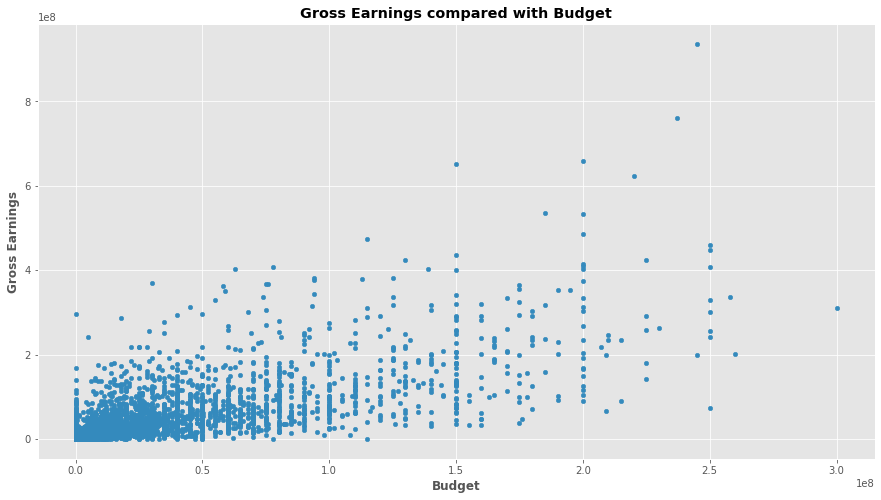

In [10]:
#Plot Budget vs. Gross Earnings
fig, ax = plt.subplots(figsize = (15,8))
plot_1 = df.plot.scatter(x = 'budget', y='gross', ax=ax)
ax.set_xlabel('Budget', fontweight ='bold') 
ax.set_ylabel('Gross Earnings', fontweight ='bold') 
ax.set_title('Gross Earnings compared with Budget', fontweight = 'bold')

Text(0.5, 1.0, 'Test')

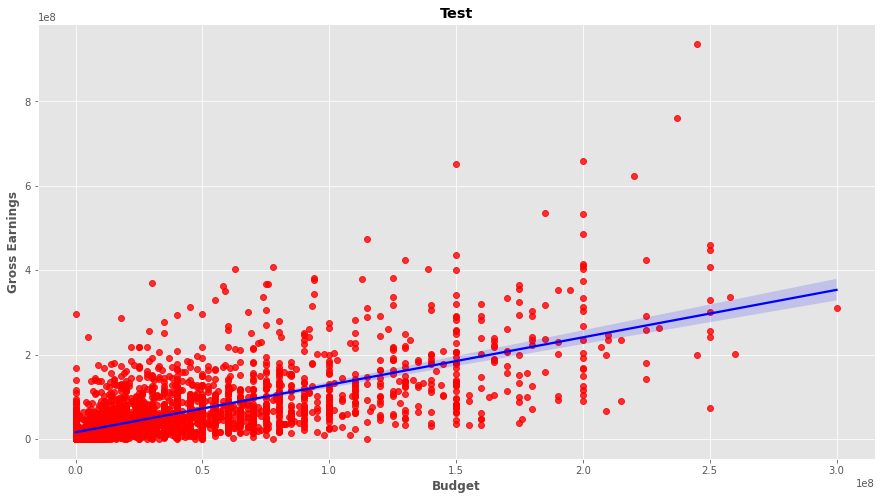

In [11]:
# Using seaborn
fig, ax = plt.subplots(figsize = (15,8))
plot_1 = sns.regplot(x = 'budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'}, ax=ax)

ax.set_xlabel('Budget', fontweight ='bold') 
ax.set_ylabel('Gross Earnings', fontweight ='bold') 
ax.set_title('Test', fontweight = 'bold')

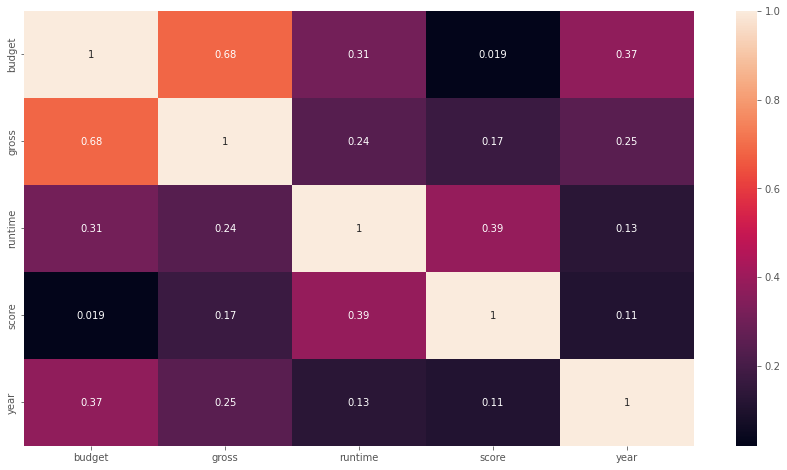

In [12]:
# Only number correlations using pearson
corr_matrix = df.corr(method = 'pearson')
#Visualize correlation matrix
fig, ax = plt.subplots(figsize = (15,8))
corr_plot = sns.heatmap(corr_matrix, annot=True, ax=ax)

In [13]:
#Convert object datatypes columns to numbers
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearCorrect
0,8000000,257,37,1018,1,52287414,2133,6,29,89,8.1,1150,1722,1986,0
1,15000000,668,37,1244,0,179800601,2861,4,16,110,6.9,1098,874,1986,0
2,18500000,837,37,478,0,85160248,133,6,24,137,8.4,1039,768,1986,0
3,6000000,668,37,597,4,70136369,827,5,19,103,7.8,767,928,1986,0
4,9000000,668,37,449,4,40471663,1777,5,6,96,6.8,824,928,1986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,425,36,127,3,15425870,2513,6,1665,127,7.0,150,542,2016,30
3096,27500000,565,37,224,4,35537564,640,6,1642,102,6.0,945,944,2016,30
3097,70000000,709,37,873,2,72655779,2166,4,1677,87,6.8,52,1362,2016,30
3098,50000000,632,37,988,0,127440871,441,5,1661,107,6.3,315,727,2016,30


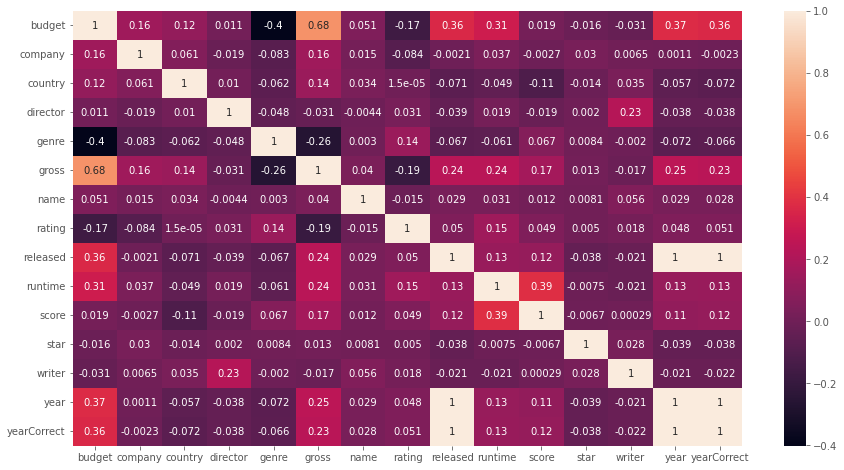

In [14]:
corr_matrix_cat = df_numerized.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (15,8))
corr_cat = sns.heatmap(corr_matrix_cat, annot=True, ax=ax)

In [15]:
corr_pairs = df_numerized.corr().unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs[(sorted_pairs) > 0.5]

gross        budget         0.682588
budget       gross          0.682588
yearCorrect  year           0.996846
year         yearCorrect    0.996846
released     year           0.996873
year         released       0.996873
released     yearCorrect    0.999434
yearCorrect  released       0.999434
budget       budget         1.000000
rating       rating         1.000000
writer       writer         1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearCorrect  yearCorrect    1.000000
dtype: float64